<a href="https://colab.research.google.com/github/paresh1807/Supervised-ML-Regression/blob/main/Capstone_project_ML(REGRESSION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Yes Bank was a very reputed bank till 2018. After 2018, the bank came under the umbrella of risk inflated banks because of the fraud case by Rana kapoor. This project would help not only yes bank but to all those banks who want to predict their future and are in conundrum for their future. So Machine Learning is helping us to resolve the issue of all those companies and firms who want to gather some courage in order to survive in the market for a longer time.
By predicting the price with the acquaintance of Machine Learning especially the linear Regression and other regressors, which helped firms and companies to sustain in the market.
In this project the monthly Open,Close,Low and High prices of Yes Bank stock have helped to train the model on which learning occurred and then the respective prediction occurs.

# **GitHub Link -**

https://github.com/paresh1807/Supervised-ML-Regression

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time Series models or any other predictive models can do justice to such situations. This Dataset has monthly stock prices of the bank since its inception and includes closing, opening, highest and lowest stock prices of every month. The main objective is to predict the closing stock price of the month.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge,
ElasticNet)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
## Mounting google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Creating path for the dataset
yesbank_data='/content/drive/MyDrive/Colab Notebooks/data_YesBank_StockPrices.csv'
yesbank_df=pd.read_csv(yesbank_data)

### Dataset First View

In [ ]:
# Dataset First Look
yesbank_df.head() ##  shows the top 5 rows.


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
yesbank_df.tail() ## shows the last 5 rows.

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
yesbank_df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
yesbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(yesbank_df[yesbank_df.duplicated()])

0

**There are no duplicate values in the dataset.**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
yesbank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**There are no null values in the dataset.**

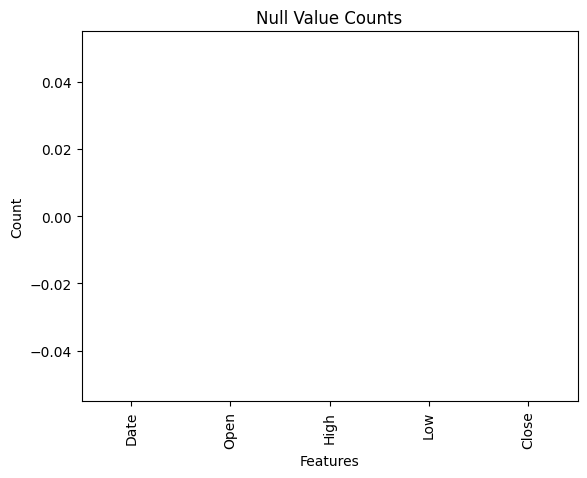

In [ ]:
# Visualizing the missing values
null_counts= yesbank_df.isnull().sum()
null_counts.plot.bar()
plt.title('Null Value Counts')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

### What did you know about your dataset?

The given dataset of yesbank has 185 rows and 5 Columns/Features in which we have the target label/dependent variable-  "close"{i.e. we have to predict the closing stock price} with help of our independent variable i.e.- "Date", "open", "High", "Low".There are no null and duplicate values in the dataset."Date" feature have object datatype which will be converted in datetime datatype in further process.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
yesbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
## It gives the Statistical Information about the numeric column.
yesbank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

In the given dataset there are 185 rows and 5 features,Features description are as follows-


*   **Date**-: Date denotes the date of investment(date contains month and year for a particular price.)
*   **Open**-:  It is the price at which a stock started trading.


*   **High**-: It is the highest price at which a stock is traded during a period.
*   **Low**-: It is the minimum price at which a stock is traded during a period.


*   **Close**-: The closing price refers to a stock's trading price closed at the end of a trading day .It's a dependent variable that we need to predict from our respective ML models.The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.








### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
yesbank_df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
## As we have seen in dataset that 'DATE' feature is in not the correct format, so we have to change it in 'Datetime' format
# First check the format of 'Date' Feature
yesbank_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object



* From the above output it is seen that DATE is in the format of        **MMM-YY**  but we have to convert it into proper date format like
 **YYYY-MM-DD**.




In [ ]:
# Converting Date to Datetime format(YYYY-MM-DD)
yesbank_df['Date']= pd.to_datetime(yesbank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [ ]:
yesbank_df['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [ ]:
## Again checking the dataset information regarding its datatype
yesbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB




* But the problem is that our ML models doesn't work on "Date" data.So we need to convert it into numerical column.But, numerical date have no use in our respective dataframe to predict the goal .So,make the "Date" column as dataframe index .



In [ ]:
## Converting 'Date' Feature to dataframe Index.
yesbank_df.set_index('Date',inplace=True)

In [ ]:
## Checking the dataframe with index 'Date'
yesbank_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

The given dataset has 185 rows and 5 columns/features having no null and duplicates values.'Date' Feature is not in proper format so it is converted to 'datetime' format and make it to the Index of the dataframe as per our need to proceed further.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##*Univariate Analysis*

#### Chart - 1- Histogram and KDE Plot of Dependent Variable 'Close'

Text(0.5, 1.0, 'Close stock price distirbution')

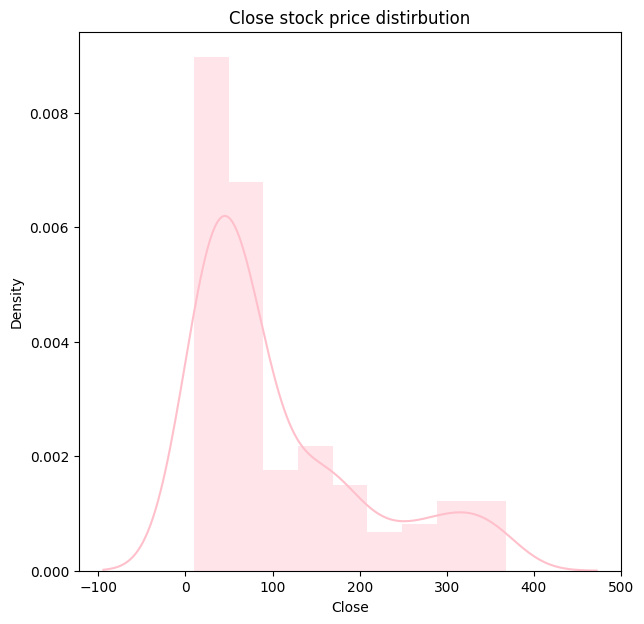

In [ ]:
## Visualization code
# Plotting the histogram to see Dependent variable 'Close' distribution which we need to predict later
plt.figure(figsize=(7,7))
sns.distplot(yesbank_df['Close'],color="pink")
plt.title("Close stock price distirbution")

##### 1. Why did you pick the specific chart?

I have picked the above chart because it combines both histogram and kde plot that offers a comprehensive visualization of the data distribution. It allows for a better understanding of the distribution's characteristics, such as its shape, peaks, and deviations from a normal distribution.The combined plot provides a richer visualization that incorporates both the frequency-based information from the histogram and the smooth density estimate from the KDE plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clearly visualize that it is right/positively skewed and has to be converted to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Currently can't say that it has a positive or negative impact but it is helpful to understand and decide upon the requirement of transformation of the features for Model implementation.Here we will use log transformation to convert it into normal distribution.

#### Chart - 2- Log Transformation of Dependent Variable 'Close'

Text(0.5, 1.0, 'Close Price Distribution after log transformation')

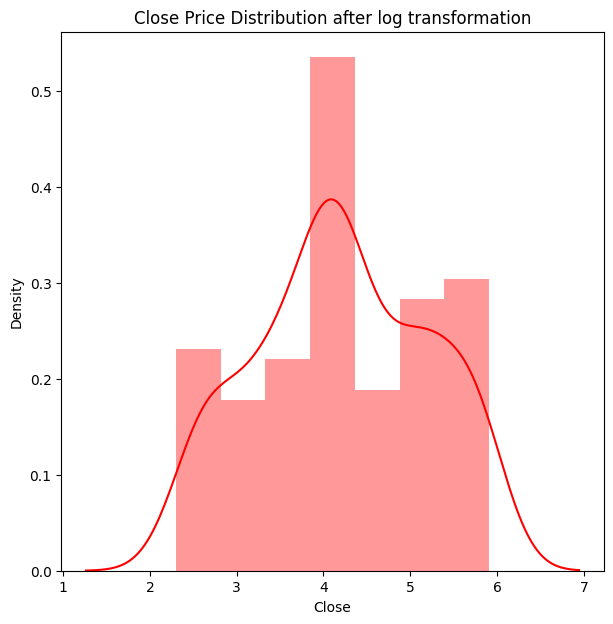

In [ ]:
## Visualization code
#  Plotting the Log Transformation to see Dependent variable 'Close' distribution which we need to predict later.
plt.figure(figsize=(7,7))
sns.distplot(np.log(yesbank_df['Close']),color="r")
plt.title("Close Price Distribution after log transformation")

##### 1. Why did you pick the specific chart?

 I have used the log transformation because the distribution is not much skewed, and log transformation is helpful to bring the normal pattern in distribution of dependent feature.Beacuse of the Log transformation outliners are removed.

##### 2. What is/are the insight(s) found from the chart?

Log transformation is sufficient to bring the noraml distribution.It shows the mean is pumped and the frequent points are not near to mean.
The plot clarifies about the bubble price of Yes Bank stock remained for very less time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to observe the peak and vallyes in closing stock price.The inflated price at mean is temporary as it is a bubble point and after this the price got decline tremendously because of the fraud case which happened in 2018.

#### Chart - 3- Histogram,KDE and Box plot of Independent Variables

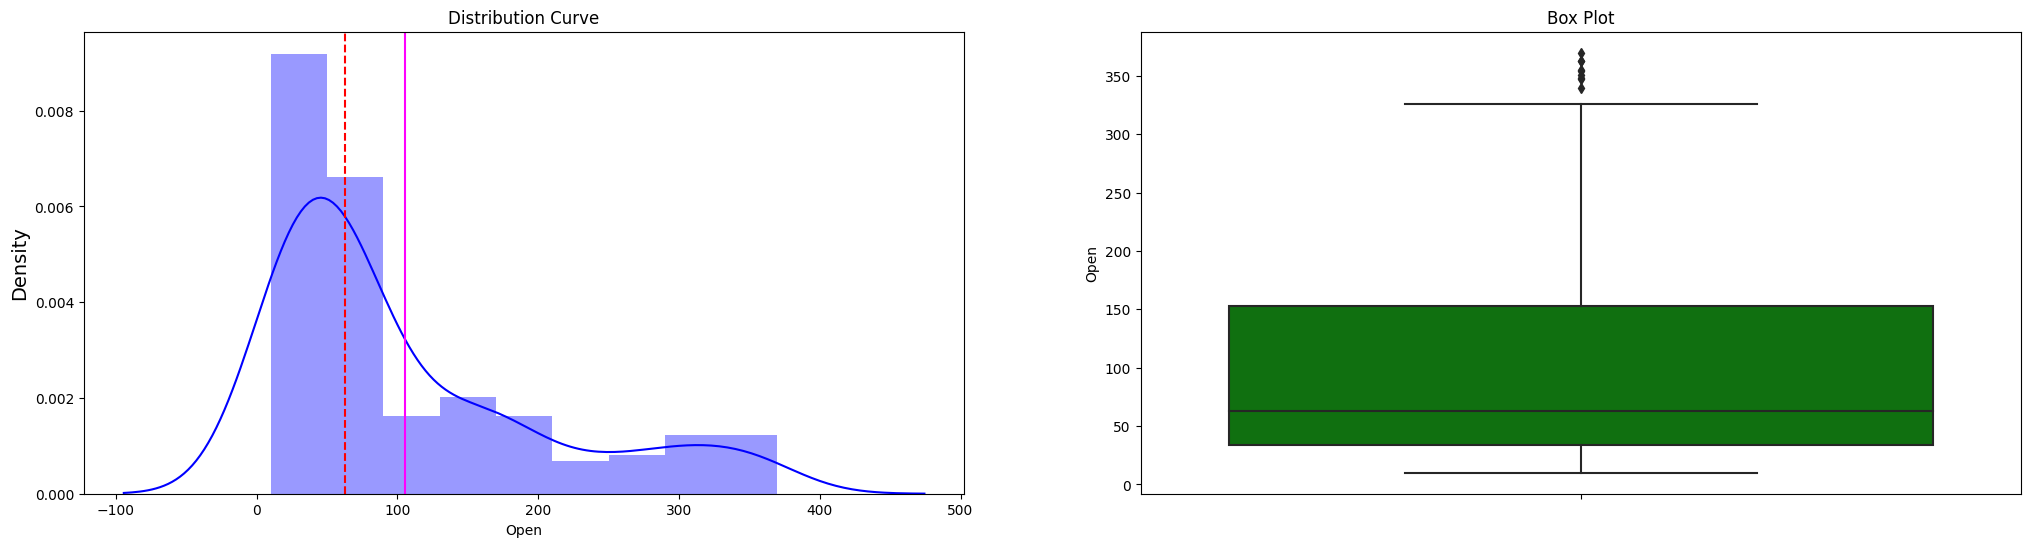

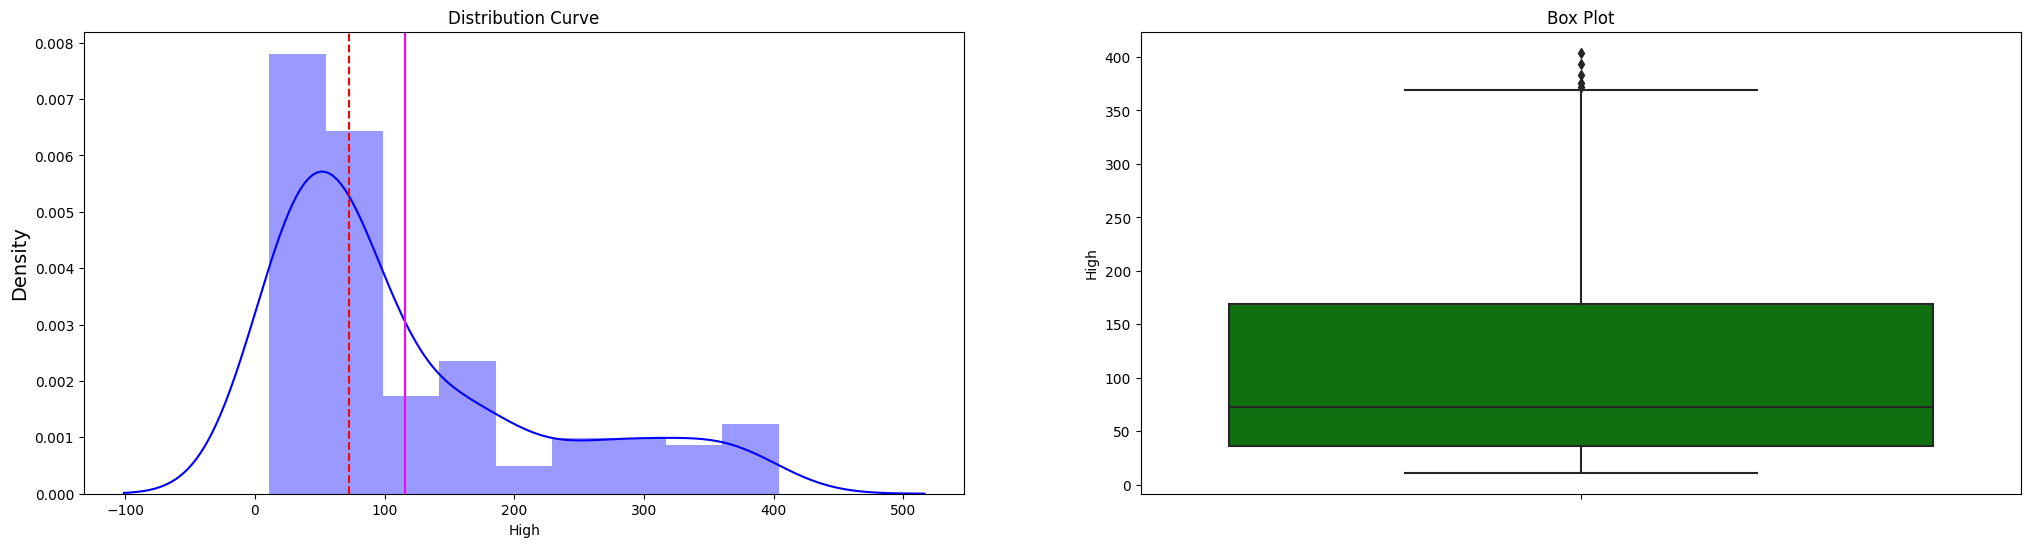

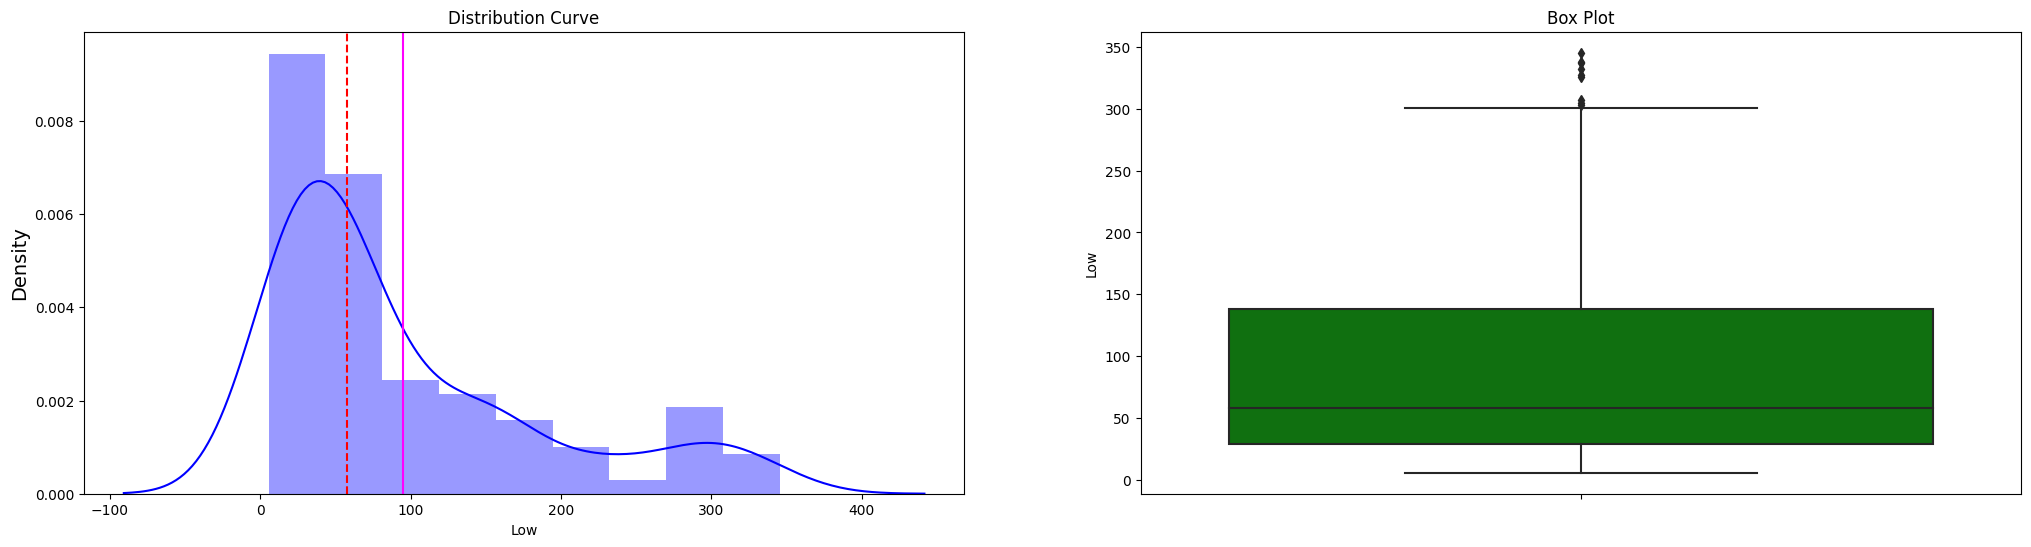

In [ ]:
## Visualization code
# Initializing variable for indepenedent features.
indp_numeric_features = yesbank_df.describe().columns[0:3]
indp_numeric_features

for col in indp_numeric_features:
    plt.figure(figsize=(25, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(yesbank_df[col], color="blue")
    plt.title('Distribution Curve')

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot

    plt.ylabel("Density", size=14)
    plt.axvline(yesbank_df[col].mean(),color='magenta',linewidth=1.5)
    plt.axvline(yesbank_df[col].median(),color='red',linestyle="dashed",linewidth=1.5)

# using subplot() function of matplotlib to create boxplot in this figure itself
# Box plot is used to check outliers are present in respective features or not

    plt.subplot(1, 2, 2)
    plt.title('Box Plot')
    sns.boxplot(y=yesbank_df[col], color="green")

plt.show()

##### 1. Why did you pick the specific chart?

I have picked the above chart because it combines histogram,kde and box plot that offers a comprehensive visualization of the data distribution and outliner as well. It allows for a better understanding of the distribution's characteristics, such as its shape, peaks, and deviations from a normal distribution.The combined plot provides a richer visualization that incorporates both the frequency-based information from the histogram and the smooth density estimate from the KDE plot and in Box plot the quartile divides the data in four equal parts from which we can recognize max.,min.,mean and median of the data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clearly visualize that it is right/positively skewed and has to be converted to normal distribution and by converting it to normal distribution outliners can be removed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Currently can't say that it has a positive or negative impact but it is helpful to understand and decide upon the requirement of transformation of the features for Model implementation.Here we will use log transformation to convert it into normal distribution and to remove outliner.

#### Chart - 4- Log Transformation of Independent Variables

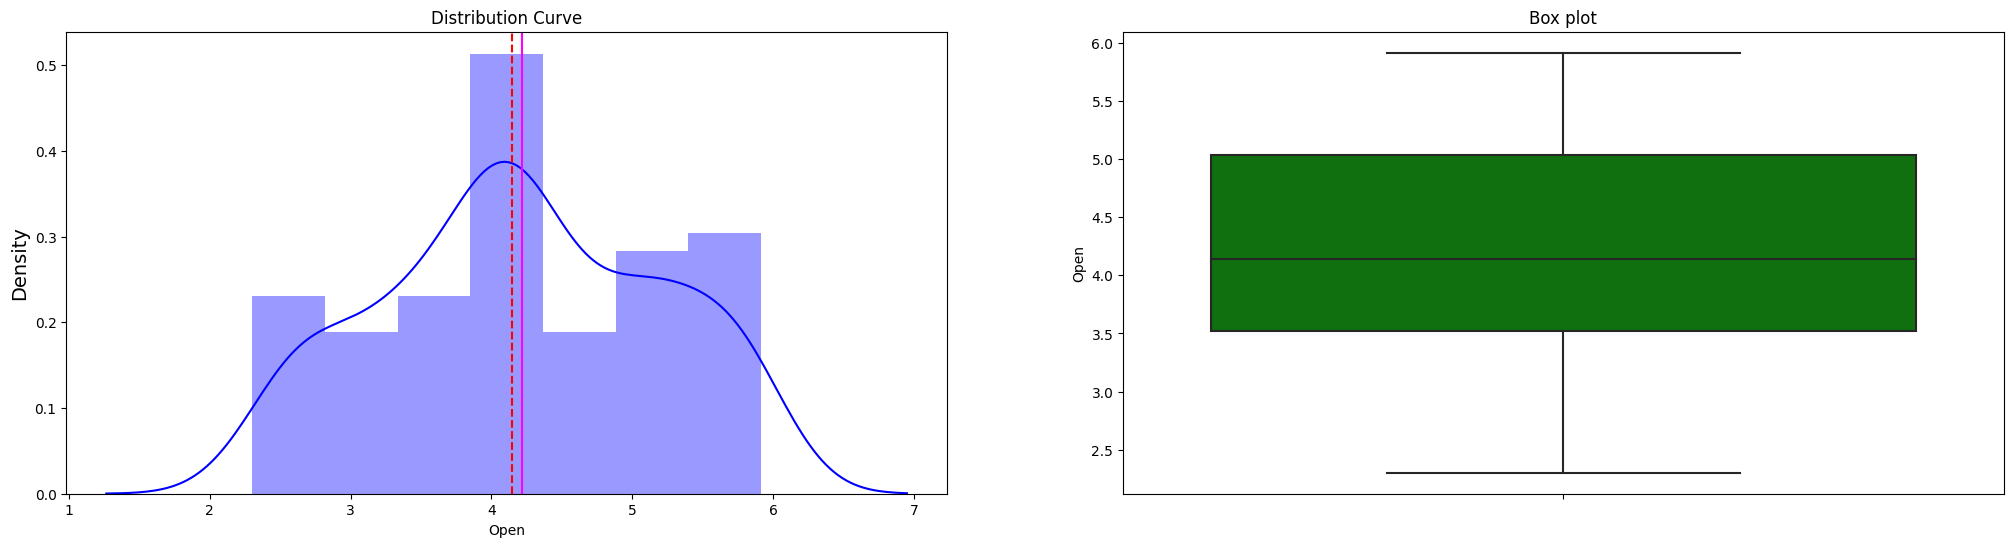

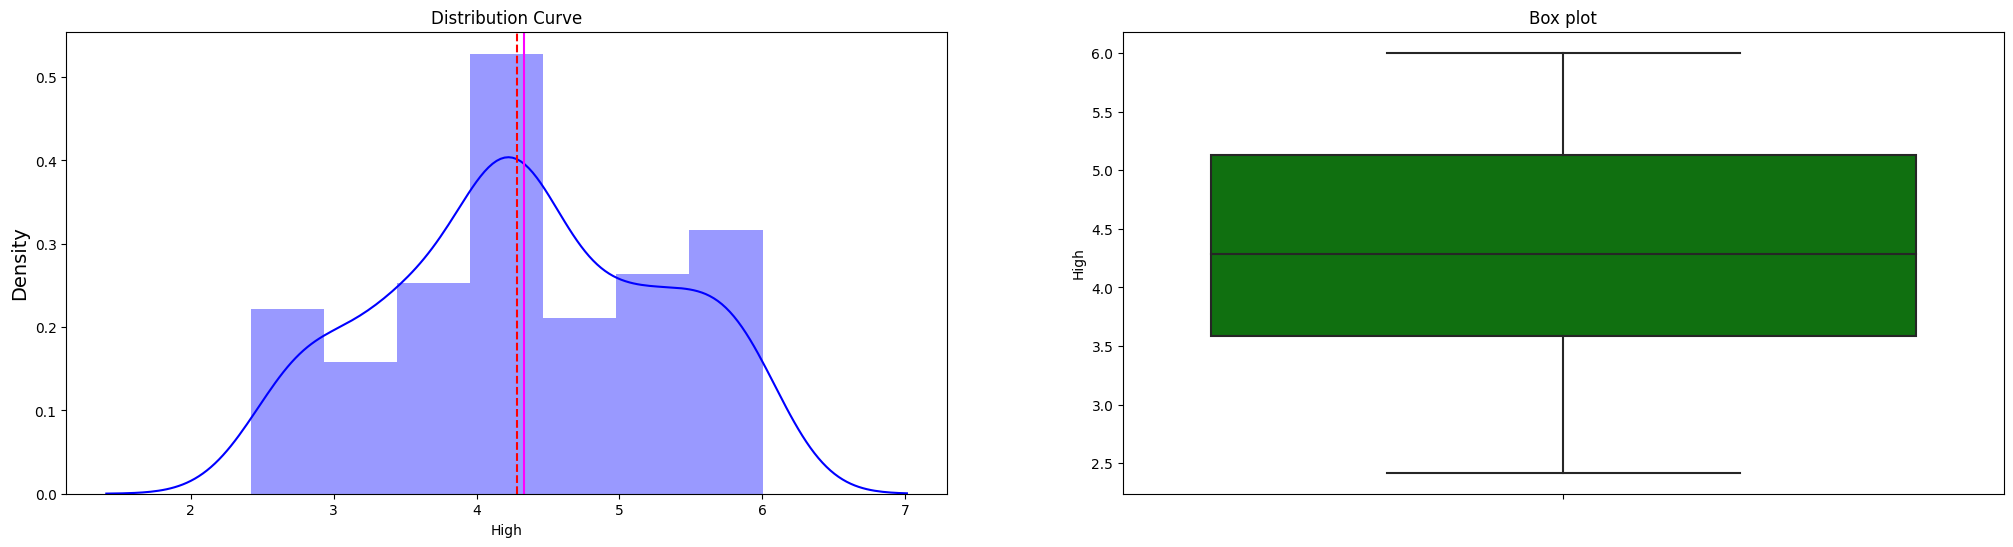

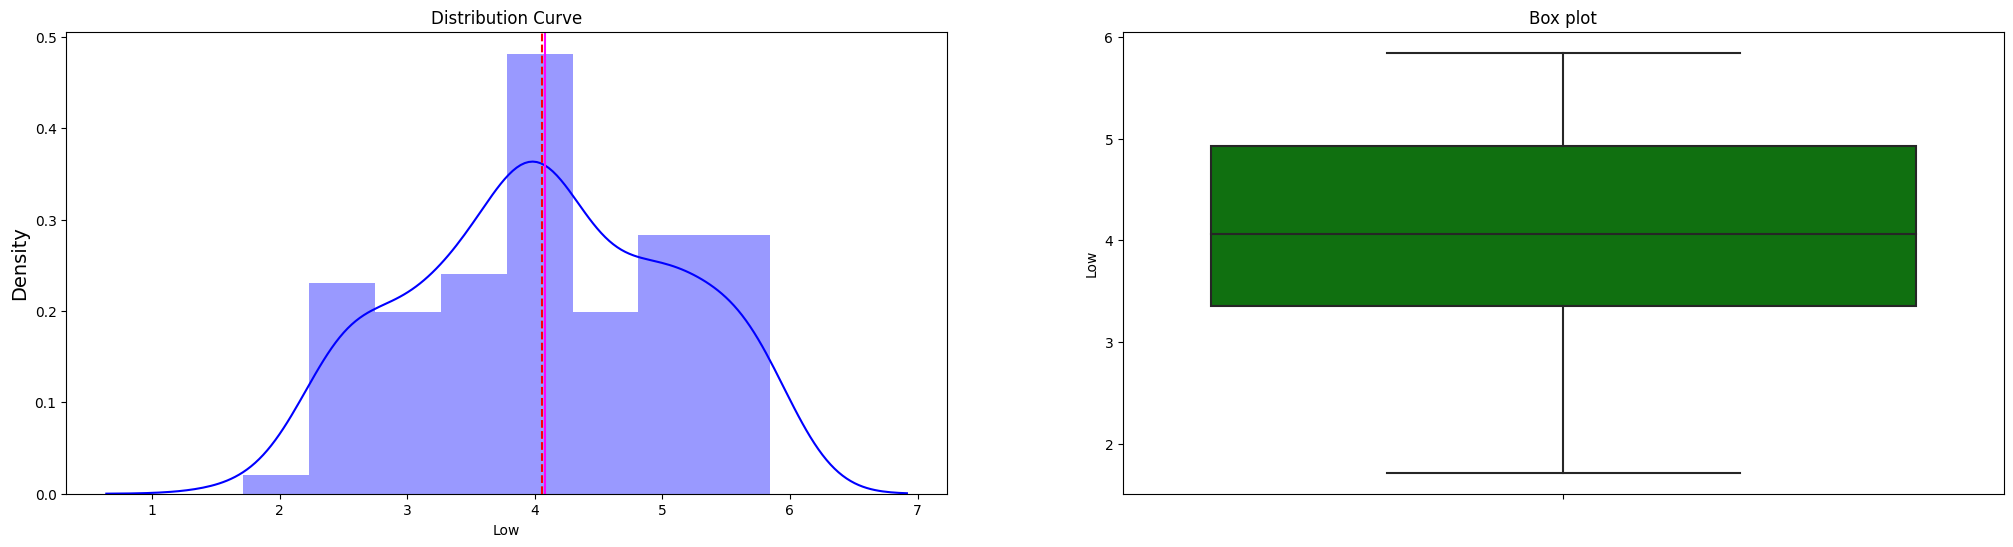

In [ ]:
## Visualization code
# log tranformation to convert Independent Feautres to normal distribution

for col in indp_numeric_features:
    plt.figure(figsize=(25, 6))
    plt.subplot(1, 2, 1)
    plt.title("Distribution Curve")

# np.log() is a method in numpy library to convert our dataset values into log transformation to get a normal distribution curve

    feature_to_log = np.log(yesbank_df[col])  # assign log tranformation value into a variable
    sns.distplot(feature_to_log, color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot

    plt.ylabel("Density", size=14)
    plt.axvline(feature_to_log.mean(),color='magenta',linewidth=1.5)
    plt.axvline(feature_to_log.median(),color='red',linestyle="dashed",linewidth=1.5)

# creating boxplot to see if there is any outliers in any feature or not
# using subplot() function of matplotlib to create boxplot in this figure itself

    plt.subplot(1, 2, 2)
    plt.title("Box plot")
    sns.boxplot(y=feature_to_log, color="green")

plt.show()

##### 1. Why did you pick the specific chart?

I have used the log transformation because the distribution is not much skewed, and log transformation is helpful to bring the normal pattern in distribution of dependent feature.Beacuse of the Log transformation outliners are removed.

##### 2. What is/are the insight(s) found from the chart?

Log transformation is sufficient to bring the noraml distribution.The plot clarifies about the bubble price of Yes Bank stock remained for very less time.we can see from the distribution curve that mean is now closer median.

From the above boxplot after log transformation, we can see outliner are removed and we have approximate result of quartiles for independent features which are as follows-





*   For feature **Open-**   *Lower Quartile(Q1)-* **3.6** ,*Median(Q2)-* **4.3**, *Upper Quartile(Q3)-* **5.0**
*   For feature **High-**  *Lower Quartile(Q1)-* **3.7** ,*Median(Q2)-* **4.4**, *Upper Quartile(Q3)-* **5.2**
*   For feature **Low-** *Lower Quartile(Q1)-* **3.3** ,*Median(Q2)-* **4**, *Upper Quartile(Q3)-* **4.9**
















##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps to observe the peak and vallyes in stock prices.The inflated price at mean is temporary as it is a bubble point and after this the price got decline tremendously because of the fraud case which happened in 2018.

After the log transformation, the outliner are removed and the distribution is converted to normal pattern which will suffice the model requirements and help to achieve better accuracy of our models,so we can say that the transformation has a positive impact.

##*Bivariate Analysis*

#### Chart - 5- Lineplot

[Text(0.5, 1.0, 'Yes Bank closing price'), Text(0.5, 0, 'Year')]

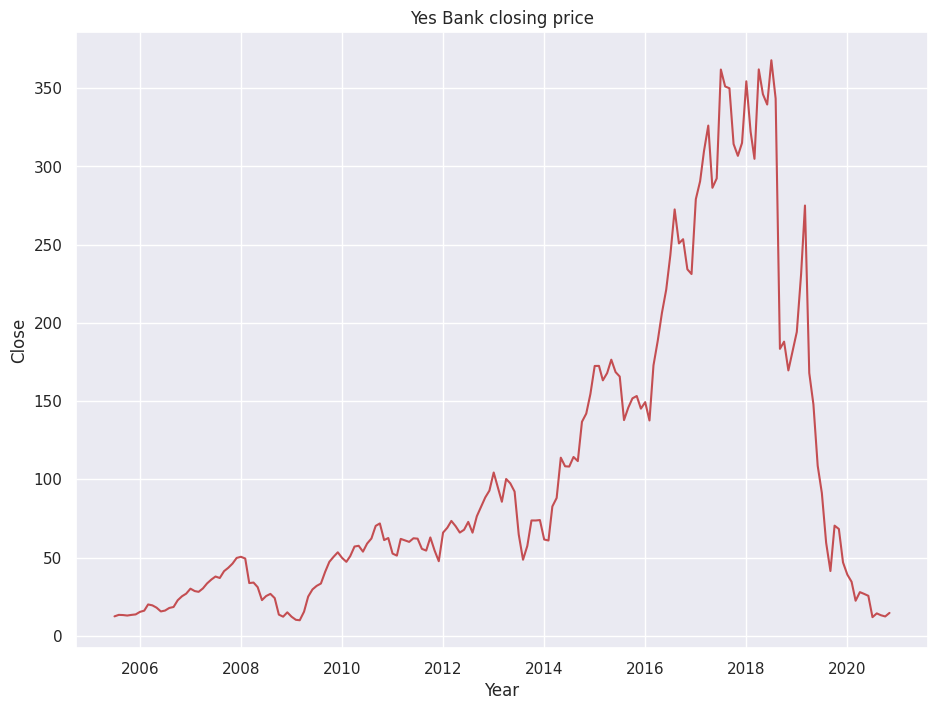

In [ ]:
## Visualization code
# Visualizing yesbank stock closing price over the time.
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(11,8)})
sns.lineplot(x="Date", y="Close",data=yesbank_df,color='r').set(title='Yes Bank closing price',xlabel='Year')

##### 1. Why did you pick the specific chart?

Line plot is used to show the progression of a variable over time or any continuous variable that has an inherent order. They are particularly useful for visualizing trends, seasonality, and changes in values over time.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can easily see that price has increasing trend from 2009-2108 but after 2018 there is sudden drop in the prices because of the fraud case involving Rana Kapoor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we know the stock closing price serves as a benchmark for determining how a stock performs and also help investors comprehend how its value has changed over time.From the above plot it is seen that stock closing price diminishes continously after 2018 ,so it is alarming for the yes bank to cope with this situation as closing price is that one price which drives investors to invest in a stock or not.So, as per scnerio the insights have a negative impact on business, but by observing the trend they must try to restrict the stock manipulation to become stable in terms of revenue.

#### Chart - 6- Scatter Plot(Checking Relationship b/w Independent Variable and Dependent Variable)

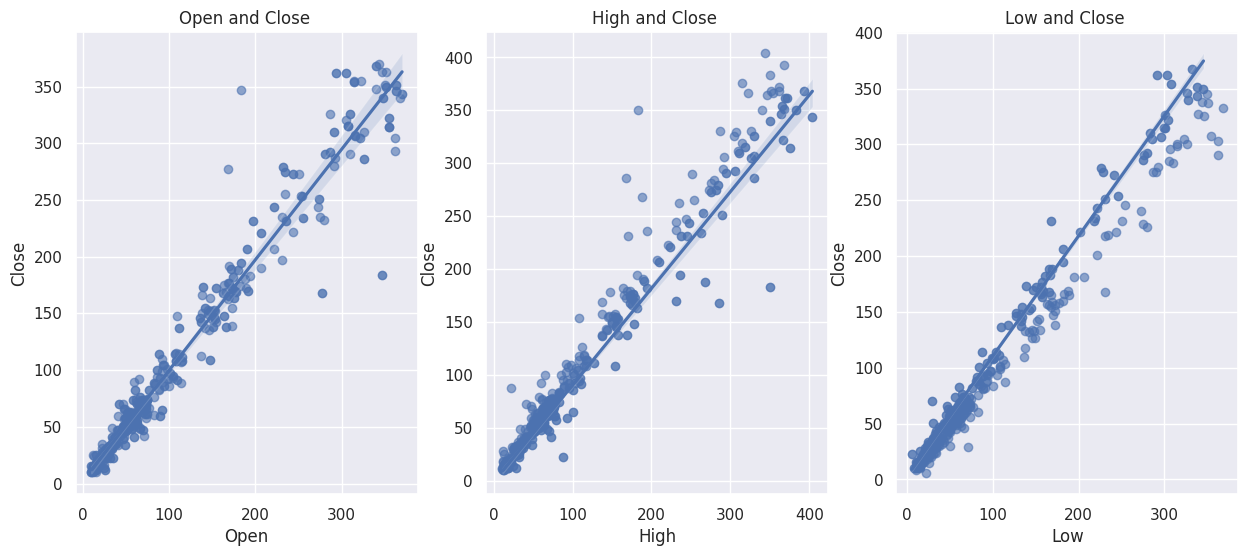

In [ ]:
## Visualization code
# Visualizing the relation b/w independent and dependent variable
plt.figure(figsize = (15,6))

plt.subplot(1, 3, 1)
plt.scatter(yesbank_df['Close'], yesbank_df['Open'], alpha=0.6)
plt.title('Open and Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= yesbank_df)

plt.subplot(1, 3, 2)
plt.scatter(yesbank_df['Close'], yesbank_df['High'], alpha=0.6)
plt.title('High and Close ')
plt.xlabel('High')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= yesbank_df)

plt.subplot(1, 3, 3)
plt.scatter(yesbank_df['Close'], yesbank_df['Low'], alpha=0.6)
plt.title('Low and Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= yesbank_df)

plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot is used because it is easy to visualize the relationship between two variables.They help you understand if there is any correlation or pattern between the variables.Scatter plots are useful for assessing the strength and direction of the relationship between two variables. By examining the overall pattern of the data points, we can determine if there is a positive correlation (both variables increase together), negative correlation (one variable increases while the other decreases), or no correlation between the variables.

##### 2. What is/are the insight(s) found from the chart?

From the above plot it is visible that dependent variable is highly related to all independent variables which is a good sign while implementing the models.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have a positive correlation between independent and dependent variables which is a plus for our models but we have to be cautious about the multicollinearity and try to merge the features or drop them to rectify the multicollinearity which will ultimately increases the model accuracy.

#### Chart - 7- Heatmap(To check the Correlation b/w all features)

<Axes: >

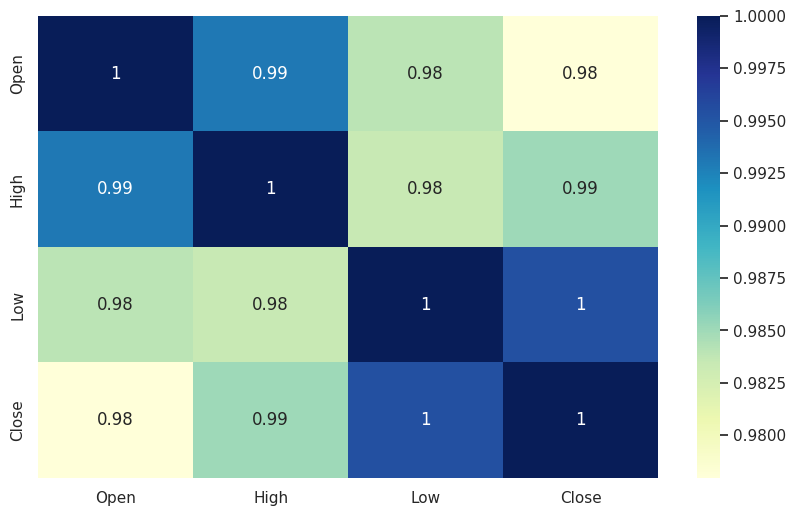

In [ ]:
# Visualization code
## First step to check multicollinearity
plt.figure(figsize=(10,6))
correlation = yesbank_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')

##### 1. Why did you pick the specific chart?

Heatmaps are used to visually represent data in a matrix form where each cell's color is determined by its value. Heatmaps are commonly used in data visualization to represent patterns or relationships in data, and to identify areas of high and low values or activity.Heatmap consists of small square boxes having a numeric value known as correlation coefficient.A correlation coefficient is a statistical measure that indicates the strength and direction of a linear relationship between two variables. A correlation coefficient of 0 indicates no linear relationship between the two variables, while a correlation coefficient of 1 indicates a perfect positive linear relationship (i.e., as one variable increases, the other variable increases by a constant proportion). A correlation coefficient of -1 indicates a perfect negative linear relationship (i.e., as one variable increases, the other variable decreases by a constant proportion).

##### 2. What is/are the insight(s) found from the chart?

From the above plot,it is very significant that there is high collinearity.Each and every feature is correlated with every other feature.(i.e. Multicollinearity)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights are useful to understand and get an idea about the collinearity of the features so that we could deal with it in future model implentation.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Checking for missing values in the dataset.
yesbank_df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we can with the help of above code, there is no missing values in the dataset.

### 2. Handling Outliers

In [ ]:
# Handling outliner and outliner treatment
yesbank_df1=yesbank_df.iloc[:,0:].copy() # Copying will secure the main dataframe


In [ ]:
yesbank_df1.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
## Replacing outliner with null values and then replacing null values with median.

# Replace outliers with null values
Q1 = yesbank_df1.quantile(0.25)
Q3 = yesbank_df1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yesbank_df1[(yesbank_df1 < lower_bound) | (yesbank_df1 > upper_bound)] = np.nan

# Replace null values with median
median = yesbank_df1.median()
yesbank_df1 = yesbank_df1.fillna(median)

In [ ]:
yesbank_df1.isnull().sum() # Crossverifying the null values,that it is replaced or not.

Open     0
High     0
Low      0
Close    0
dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Firstly I went with **log transformation** of features in the visualization part where transformation to the data can sometimes help to normalize the distribution and reduce the impact of outliers.This transformation can make the data more suitable for analysis while minimizing the effect of extreme values but it is not the most robust method to deal with outliers.

Secondly, I came up with  **Interquartile Range (IQR) method** which is a robust statistical method in which I replaced the outliers of all feature with its respective median so that the distribution do not drastically change and should not be affected by the outliers.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation



* Generally it might happen when we replaced outliers with median, our correlation b/w independent and dependent variable got distorted that will affect our model accuracy, so analyzing again  the correlation b/w independent and variable, if distorted then will apply log transformation to data frame (yesbank_df1) which is the copy of main data frame.



In [ ]:
# Manipulating the feature/variable-
corr = yesbank_df1.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Open,High,Low,Close
Open,1.00,0.84,0.90,0.85
High,0.84,1.00,0.77,0.83
Low,0.90,0.77,1.00,0.94
Close,0.85,0.83,0.94,1.00


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
## Feature selection for Independent and dependent variable
independent_variable= [i for i in yesbank_df1.columns if i not in ['Close']]
dependent_variable= 'Close'

##### Which all features you found important and why?

'Open', 'High', 'Low' are Important features as they contain maximum information which will be very helpful for prediction.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transforming data
yesbank_df1['Open']= np.log(yesbank_df1['Open'])
yesbank_df1['High']= np.log(yesbank_df1['High'])
yesbank_df1['Low']= np.log(yesbank_df1['Low'])
yesbank_df1['Close']= np.log(yesbank_df1['Close'])

In [ ]:
yesbank_df1.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,2.564949,2.639057,2.420368,2.522524
2005-08-01,2.532108,2.700018,2.529721,2.596746
2005-09-01,2.601207,2.699346,2.507157,2.587764
2005-10-01,2.580217,2.672078,2.517696,2.564180
2005-11-01,2.591516,2.630449,2.555676,2.596001


<Axes: >

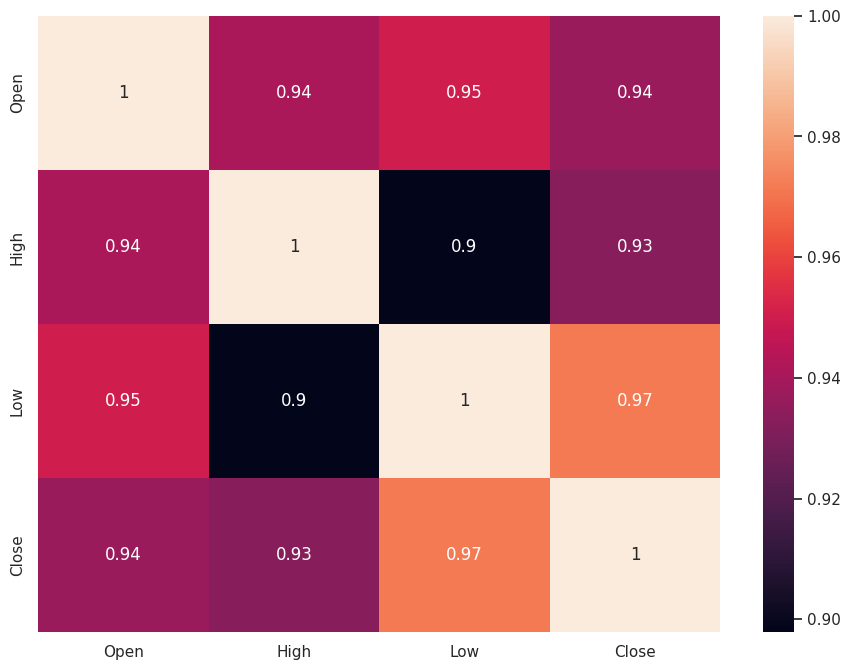

In [ ]:
## Checking the correlation b/w independent and dependent variable that it is restored or not, after data transformation.
cor_log=yesbank_df1.corr()
sns.heatmap(cor_log,annot=True)

Data Transformation is required and I have used log transformation(np.log) for the data which is given. The reasons behind the transformation are as follows-


* Data which is given is right skewed so to make the distribution normal and symmetric transforamtion is required which will help to implement model correctly and pricesly which help us to reach towards desired accuracy.
* After treating outliers the correltion b/w independent and dependent variable got distorted so to restore that, transformation is required and as we can see from the above heatmap the correlation are restored which will make our model more accurate for prediction, but it has **multicollinearity** and to deal with it we have to drop that feature which is least correlated with the target variable, but by doing so we lose the valuable information as our dataset is small, so we continue with the multicollinearity and check how our model behaves with this phenomena.



### 4. Data Splitting

In [ ]:
# Splitting the data to train and test.
X= yesbank_df1[independent_variable].values
y=yesbank_df1[dependent_variable].values


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split( X ,y , test_size= 0.2,random_state=0)
print(X_train.shape,X_test.shape)
print(Y_train.shape , Y_test.shape)

(148, 3) (37, 3)
(148,) (37,)


##### What data splitting ratio have you used and why?

For the Data spliting, the 20% data has been splitted as test data. As the data is already very small 20 % would be enough to test upon the training model.

### 5. Data Scaling

In [ ]:
# Scaling the data
scaler= MinMaxScaler()
X_train1= scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

##### Which method you have used to scale your data and why?

I have used Standard and MinMax Scaler to scale the data.The reason to use scaling is that it provides benefits in terms of algorithm performance, convergence speed, and interpretability.

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

reg  = LinearRegression()

# Fit the Algorithm
reg.fit(X_train1 , Y_train)

# Predict on the model
y_pred = reg.predict(X_test1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.


* we’ll find that linear regression is used in everything from biological, behavioral,financial and stocks, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.
* The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.



In [ ]:
# Visualizing performance using evaluation Metric Score chart
train_accuracy = reg.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred), 4))

Train accuracy is  0.9711264531550466
 Test accuracy is  0.9407608051743694
MSE value : 0.0489
RMSE value : 0.2211
MAE value : 0.0911
MAPE value : 0.0225


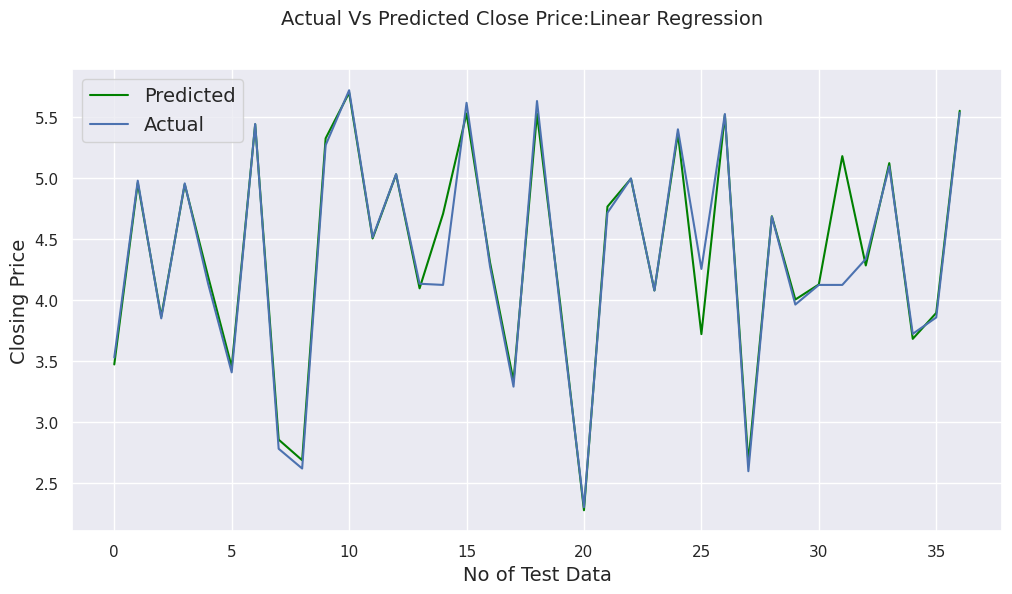

In [ ]:
# Liner Regression plot- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred),color='green')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Linear Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
lasso= Lasso(alpha=0.00001)
# Fit the Algorithm
lasso.fit(X_train1,Y_train)
# Predict on the model
y_pred_lasso = lasso.predict(X_test1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

LASSO stands for *Least Absolute Shrinkage and Selection Operator*. I know it doesn’t give much of an idea but there are 2 key words here – *absolute* and *selection*.

Lasso regression performs **L1 regularization**, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

**Objective = RSS + α * (sum of absolute value of coefficients)**

Here, α (alpha) provides a trade-off between balancing RSS and magnitude of coefficients.α can take various values. Lets iterate it here briefly:

1.α = 0: Same coefficients as simple linear regression.

2.α = ∞: All coefficients zero (same logic as before).

3.0 < α < ∞: coefficients between 0 and that of simple linear regression.


In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = lasso.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_lasso)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_lasso), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_lasso)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_lasso), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_lasso), 4))

Train accuracy is  0.971126325829468
 Test accuracy is  0.9407253691954474
MSE value : 0.0489
RMSE value : 0.2211
MAE value : 0.0911
MAPE value : 0.0225


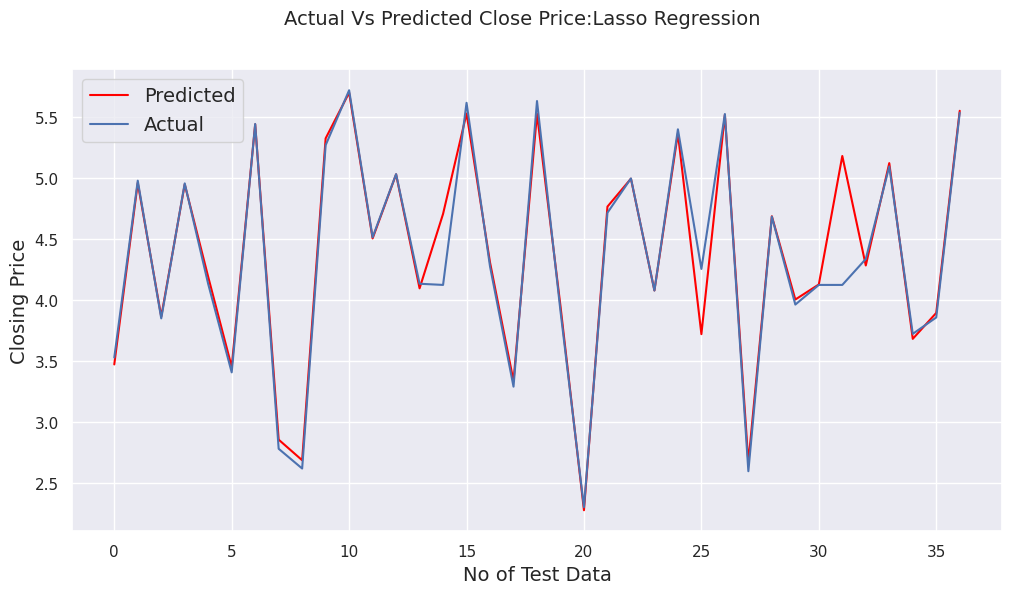

In [ ]:
# Lasso Regression plot- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_lasso),color='red')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Lasso Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

#### 2. Cross- Validation & Hyperparameter Tuning of Lasso Regularization

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.


In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
lasso_cv = Lasso()

# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_cv, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train1, Y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)



The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.026334177855545194


In [ ]:
lasso_best=Lasso(alpha = 0.001)
lasso_best.fit(X_train1,Y_train)

Lasso(alpha=0.001)

In [ ]:
# Predict the model
y_pred_best=lasso_best.predict(X_test1)

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = lasso_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_best)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_best), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_best)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_best), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_best), 4))

Train accuracy is  0.9698708585704385
 Test accuracy is  0.9360283625296586
MSE value : 0.0528
RMSE value : 0.2297
MAE value : 0.0923
MAPE value : 0.0227


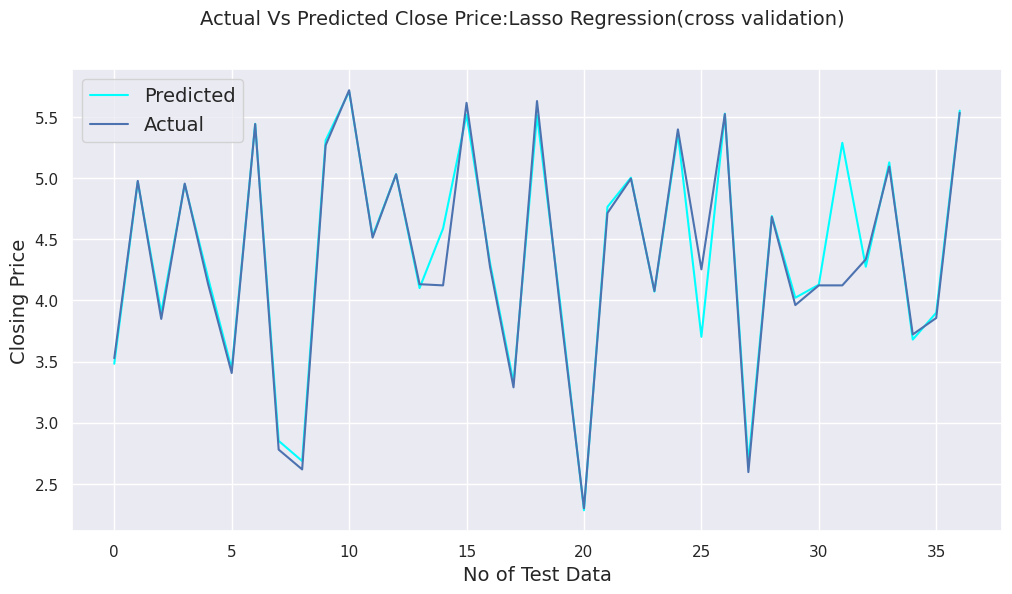

In [ ]:
# Lasso Regression plot after cross-validation - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_best),color='aqua')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Lasso Regression(cross validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



* In the normal Lasso regulariztion the accuracy for train and test is 97% and 94% respectively with RMSE- 0.2211
* But after cross validation with new value of alpha, the train and test accuracy become 96% and 93% respectively with RMSE- 0.2297

There is decrease in training as well as testing accuracy after cross-validation,this means model approaches towards slightly generalized fitting.





### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
ridge=Ridge()

# Fit the Algorithm
ridge.fit(X_train1,Y_train)

# Predict on the model
y_pred_ridge= ridge.predict(X_test1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 Ridge regression performs **L2 regularization**, i.e. it adds a factor to sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

 **Objective = RSS + α * (sum of square of coefficients)**

 Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

 1. **α = 0**:


* The objective becomes same as simple linear regression.
* We’ll get the same coefficients as simple linear regression.

2. **α = ∞**:


* The coefficients will be zero because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

3. **0 < α < ∞**:


* The magnitude of α will decide the weightage given to different parts of objective.
* The coefficients will be somewhere between 0 and ones for simple linear regression.

I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression.










In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = ridge.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_ridge)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_ridge), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_ridge)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_ridge), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_ridge), 4))

Train accuracy is  0.9548282229998163
 Test accuracy is  0.94194688697713
MSE value : 0.0479
RMSE value : 0.2188
MAE value : 0.1063
MAPE value : 0.0256


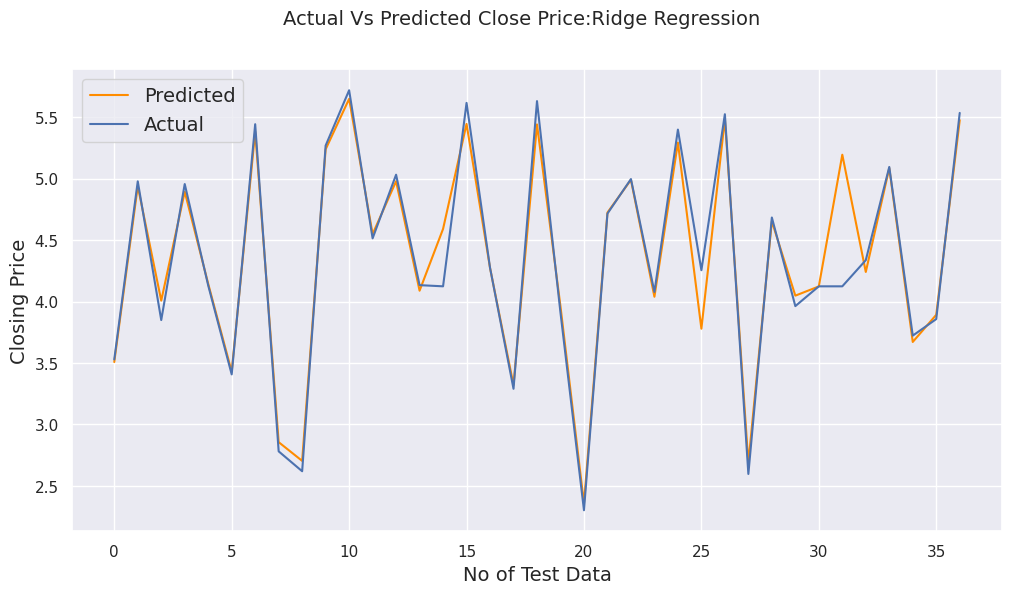

In [ ]:
# Ridge Regression plot- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_ridge),color='darkorange')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Ridge Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

**The accuracy of model for training and testing is 95% and 94% respectively.**

#### 2. Cross- Validation & Hyperparameter Tuning of Ridge Regularization

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
ridge_cv=Ridge()

# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge_cv, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train1, Y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)




The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.026651408988046816


In [ ]:
ridge_best= Ridge(alpha=0.01)
ridge_best.fit(X_train1,Y_train)


Ridge(alpha=0.01)

In [ ]:
y_pred_rcv= ridge_best.predict(X_test1)

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = ridge_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_rcv)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_rcv), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_rcv)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_rcv), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_rcv), 4))

Train accuracy is  0.971112070849953
 Test accuracy is  0.9406706896661656
MSE value : 0.0489
RMSE value : 0.2212
MAE value : 0.091
MAPE value : 0.0224


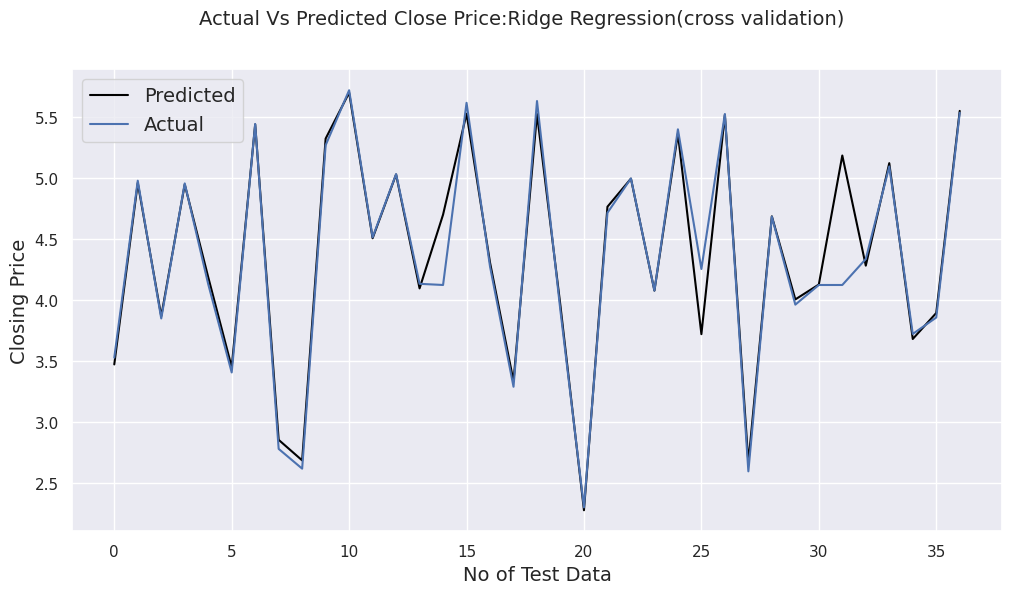

In [ ]:
# Ridge Regression plot after cross-validation - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_rcv),color='black')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Ridge Regression(cross validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



* In Ridge regularization the training and testing accuracy is 95% and 94% respectively with Rmse 0.2188
* After cross validation the ridge accuracy for training increased to 97% but testing accuracy remains 94% with Rmse 0.2212

After applying cross validation, the testing accuracy remains same as in L2 regularizarion but training accuracy increased to 97% which shows a  slightly higher risk of overfitting compared to the regularized Ridge model ,so preferably one must go with regularized Ridge model as it offers good performance, while also promoting model simplicity and interpretability.





### ML Model - 4

In [ ]:
# ML Model - 4 Implementation
elastic_reg = ElasticNet(alpha=0.001,l1_ratio=0.005)
# Fit the model
elastic_reg.fit(X_train1,Y_train)
#Predict the model
y_pred_elastic= elastic_reg.predict(X_test1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Elastic Net** is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties.

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = elastic_reg.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_elastic)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_elastic), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_elastic)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_elastic), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_elastic), 4))

Train accuracy is  0.9692887359726781
 Test accuracy is  0.9400026569034002
MSE value : 0.0495
RMSE value : 0.2225
MAE value : 0.0918
MAPE value : 0.0224


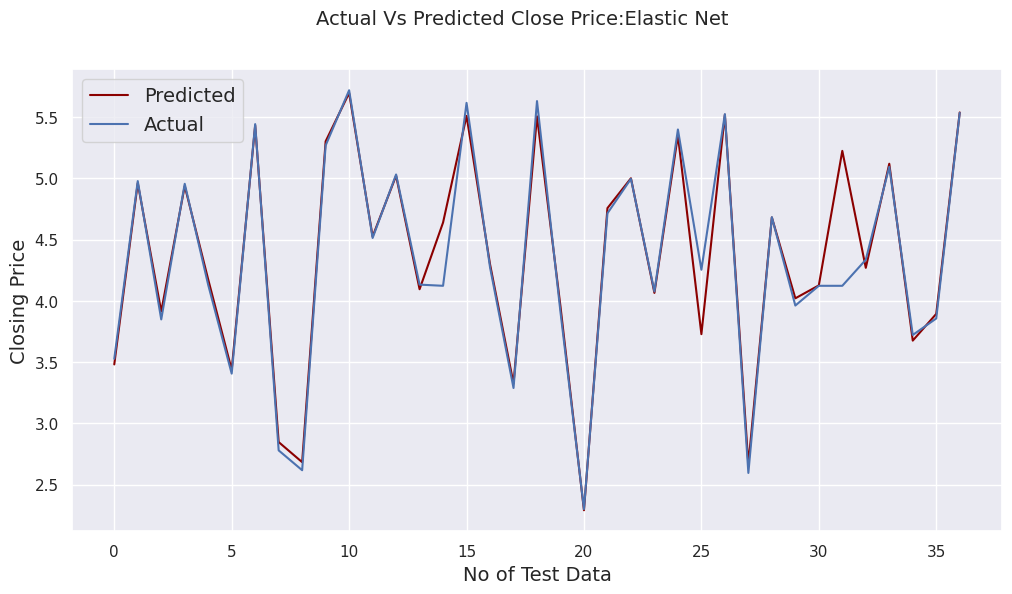

In [ ]:
# Elastic Net plot- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_elastic),color='darkred')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Elastic Net', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

#### 2. Cross- Validation & Hyperparameter Tuning of Elastic Net

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
elastic = ElasticNet()
# Fit the Algorithm
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)
elastic_model.fit(X_train1,Y_train)
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.001 1
The negative mean squared error for is:  -0.026


In [ ]:
elastic_best= ElasticNet(alpha=0.001,l1_ratio=1)
elastic_best.fit(X_train1,Y_train)

ElasticNet(alpha=0.001, l1_ratio=1)

In [ ]:
# Predict the model
y_pred_elastic_cv= elastic_best.predict(X_test1)

In [ ]:
 # Visualizing using evaluation Metric Score chart
train_accuracy = elastic_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_elastic_cv)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_elastic_cv), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_elastic_cv)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_elastic_cv), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_elastic_cv), 4))

Train accuracy is  0.9698708585704385
 Test accuracy is  0.9360283625296586
MSE value : 0.0528
RMSE value : 0.2297
MAE value : 0.0923
MAPE value : 0.0227


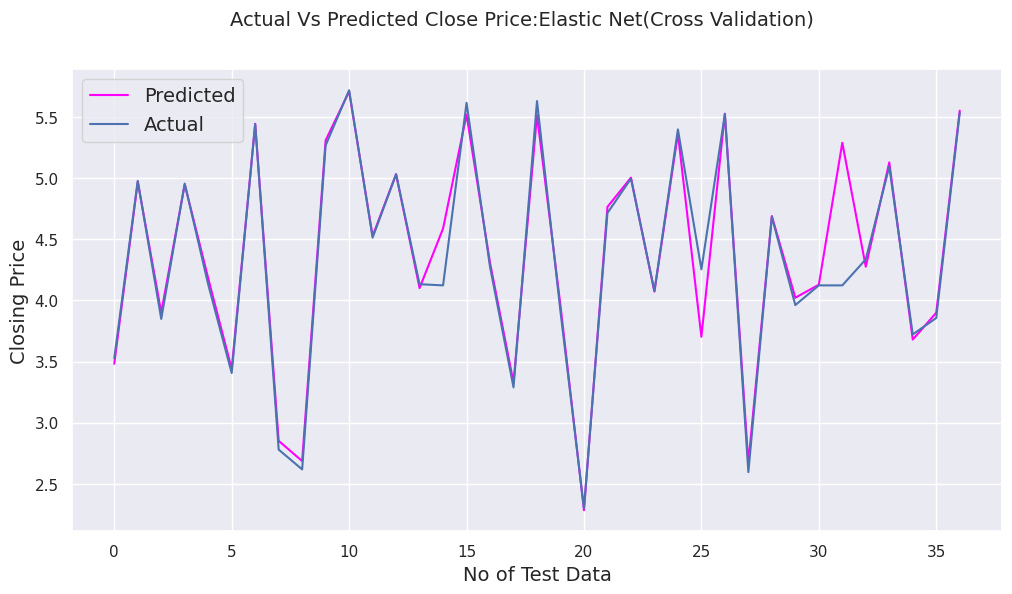

In [ ]:
# Elastic Net plot after cross validation- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_elastic_cv),color='magenta')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Elastic Net(Cross Validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



* In Elastic Net the training and testing accuracy is 96% and 94% respectively with Rmse 0.2225
* After Cross-Validation the Elastic Net accuracy for training is 96% which remains the same but the testing acuuracy decreases to 93% with Rmse 0.2297



### ML Model - 5

In [ ]:
# ML Model - 4 Implementation
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
# Fit the Algorithm
RFR.fit(X_train1, Y_train)
# Predict on the model
y_pred_RFR= RFR.predict(X_test1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It belongs to the ensemble learning family, which combines multiple individual models to create a more powerful and robust predictive model.

The basic idea behind the Random Forest algorithm is to build a "forest" of decision trees and make predictions by aggregating the results of each individual tree. Each decision tree in the forest is constructed using a random subset of the training data and a random subset of the features (input variables). This randomness helps to introduce diversity among the trees and prevents overfitting.

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = RFR.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, y_pred_RFR)
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_RFR), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_RFR)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_RFR), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_RFR), 4))

Train accuracy is  0.9919516425658484
Test accuracy is  0.9147394614764611
MSE value : 0.0703
RMSE value : 0.2652
MAE value : 0.1081
MAPE value : 0.0265


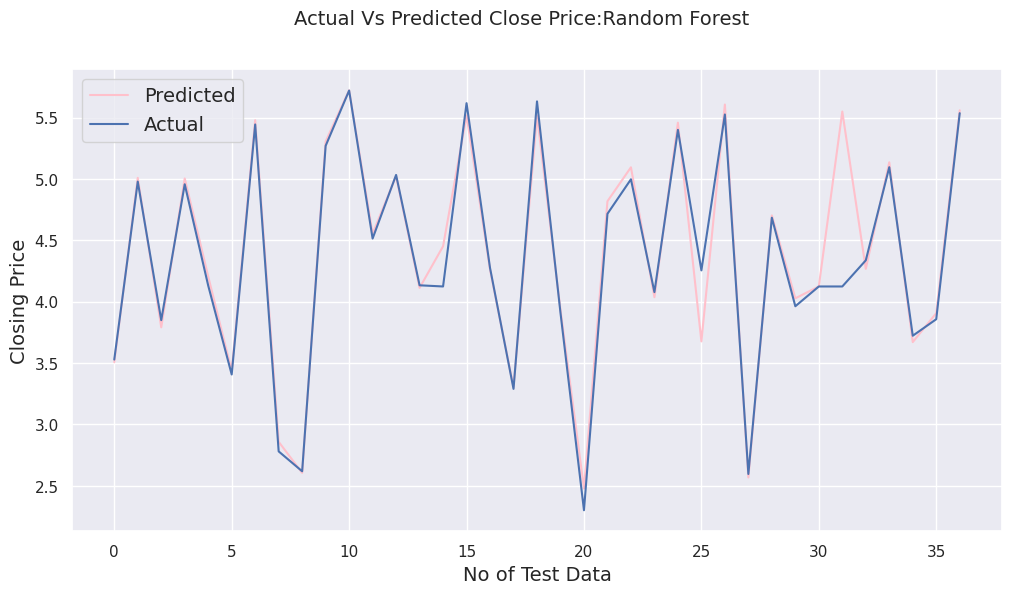

In [ ]:
# Random Forest Regressor plot - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_RFR),color='pink')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Random Forest', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

#### 2. Cross- Validation & Hyperparameter Tuning of Random Forest

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
RFR_cv = RandomForestRegressor()

# Fit the object to train dataset
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
RFR_cv_grid = GridSearchCV(RFR_cv, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5)

# Fit the Algorithm
RFR_cv_grid.fit(X_train1, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
RFR_cv_grid.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [ ]:
RFR_best=RandomForestRegressor(max_depth=3,n_estimators=50)
RFR_best.fit(X_train1,Y_train)

RandomForestRegressor(max_depth=3, n_estimators=50)

In [ ]:
# Predict the model
y_pred_RFR_CV= RFR_best.predict(X_test1)

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = RFR_best.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, y_pred_RFR_CV)
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_RFR_CV), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_RFR_CV)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_RFR_CV), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_RFR_CV), 4))

Train accuracy is  0.9723017968978843
Test accuracy is  0.9120008090152443
MSE value : 0.0726
RMSE value : 0.2694
MAE value : 0.1345
MAPE value : 0.0332


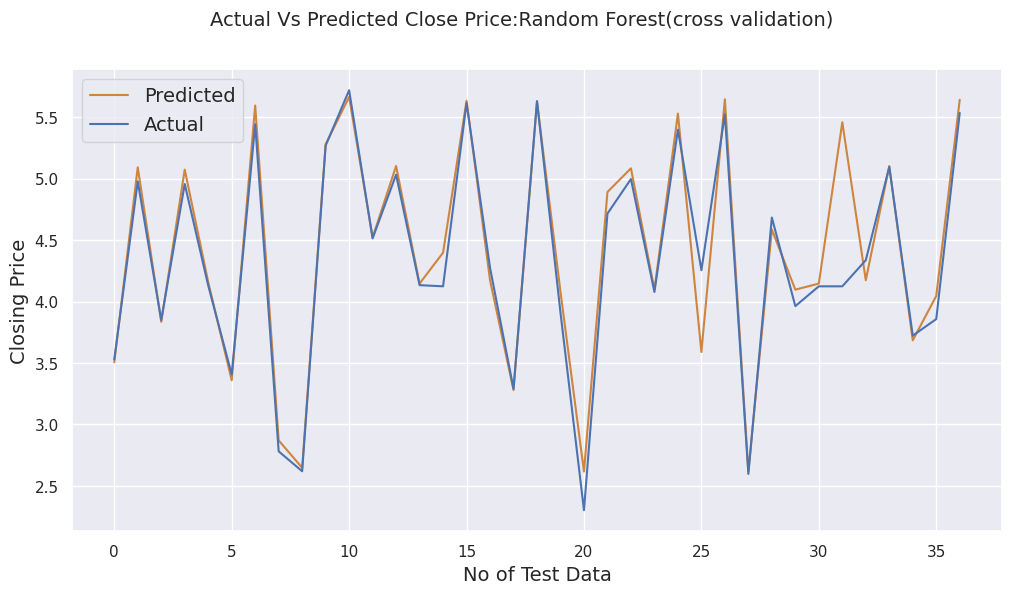

In [ ]:
# Random Forest Regressor plot after cross-validation - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_RFR_CV),color='peru')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Random Forest(cross validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



* In Random Forest the training and testing accuracy comes out to be 99% and 91% respectively with Rmse 0.2652
* After cross validation of Random Forest the training accuracy decreases to 97% and testing accuracy remains same with Rmse 0.2694 that means this model is less prone to overfitting and it may generalize better to unseen data.





### ML Model - 6

In [ ]:
# ML Model- 6 - Implementation
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Fit the model
xgb.fit(X_train1,Y_train)
# Predict the model
y_pred_xgb= xgb.predict(X_test1)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


XGBoost (eXtreme Gradient Boosting) is an advanced machine learning algorithm that belongs to the gradient boosting family. It is widely used for regression and classification tasks and has gained popularity for its high performance and scalability.The key idea behind XGBoost is to iteratively build an ensemble of weak prediction models, typically decision trees, and combine their predictions to create a strong predictive model. The algorithm optimizes a specific objective function by minimizing the loss during each boosting iteration.

*XGBoost is designed to be highly efficient and scalable, making it suitable for large datasets and complex problems.*

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = xgb.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, y_pred_xgb)
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_xgb), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_xgb)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_xgb), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_xgb), 4))

Train accuracy is  0.9999969720097964
Test accuracy is  0.9137641196764947
MSE value : 0.0711
RMSE value : 0.2667
MAE value : 0.1158
MAPE value : 0.0285


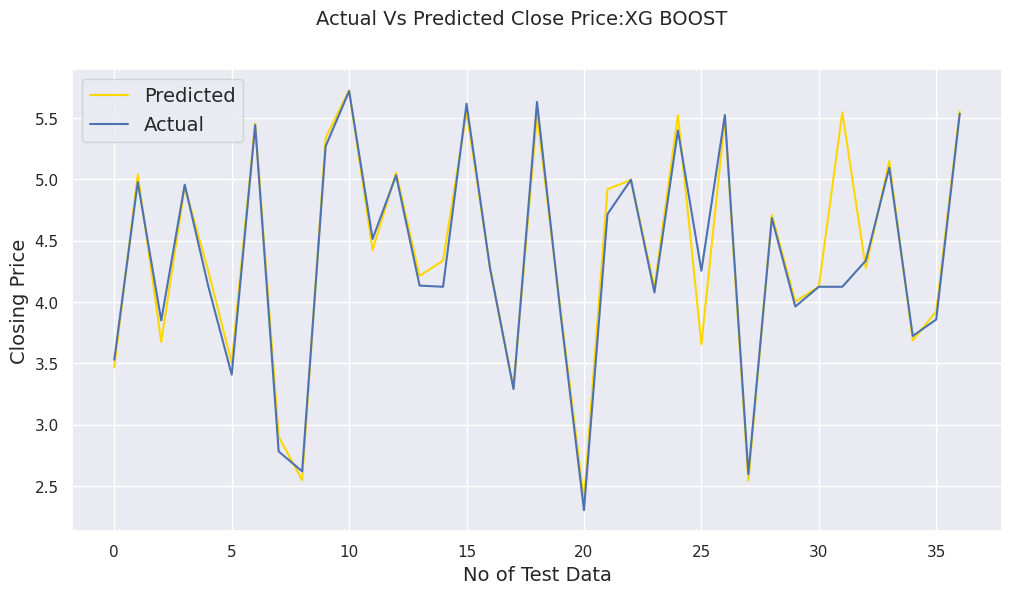

In [ ]:
# XGBOOST Regressor plot - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_xgb),color='gold')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:XG BOOST', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

#### 2. Cross- Validation & Hyperparameter Tuning of XG BOOST

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [ ]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)

from xgboost import XGBRegressor
xgb_cv = XGBRegressor()

# Define the hyperparameter grid
grid_values = {
    'n_estimators': [50, 80, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create GridSearchCV object
xgb_cv_grid = GridSearchCV(xgb_cv, param_grid=grid_values, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
xgb_cv_grid.fit(X_train1, Y_train)

# Get the best parameters and best score
best_params = xgb_cv_grid.best_params_
best_score = xgb_cv_grid.best_score_

# Print the best parameters and best score
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Score:  -0.05406735319319953


In [ ]:
XGB_best= XGBRegressor(max_depth=3,n_estimators=50,learning_rate=0.1)
XGB_best.fit(X_train1,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb_cv= XGB_best.predict(X_test1)

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = xgb.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, y_pred_xgb_cv)
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_xgb_cv), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_xgb_cv)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_xgb_cv), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_xgb_cv), 4))

Train accuracy is  0.9999969720097964
Test accuracy is  0.9167783655044655
MSE value : 0.0687
RMSE value : 0.262
MAE value : 0.1071
MAPE value : 0.0263


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



* In XG BOOST model the training and testing accuracy comes out to be 99% and 91% respectively which is sign of slightly overfitting.
* After applyting Cross Validation to XG BOOST, training and testing accuracy remains same as it was earlier in normal XG BOOST, it means  the default hyperparameters provided by XGBoost are sufficient as well as optimized, and there is no need for further hyperparameter tuning.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
# Function to run all model
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models

    i=0

    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)

        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)


        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)

        i+=1

    #Sorting values by accuracy
    df.sort_values(by=['RMSE'],ascending=True,inplace=True)

    return df

In [ ]:
models=[reg,lasso,ridge,elastic_reg,RFR,xgb]

In [ ]:
#Testing performance
report=score_model(X_train1,Y_train,X_test1,Y_test)
report

,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
2,Ridge,0.106,0.048,0.219,2.565,0.942
0,LinearRegression,0.091,0.049,0.221,2.247,0.941
1,Lasso,0.091,0.049,0.221,2.246,0.941
3,ElasticNet,0.092,0.049,0.222,2.244,0.940
5,XGBRegressor,0.116,0.071,0.267,2.849,0.914
4,RandomForestRegressor,0.103,0.073,0.270,2.502,0.911


As we can see, from the above dataframe, that all models have Rsquare(R2_SCORE) greater than 90%, it means the proportion of variation in the dependent variable is very well explained by the independent variable (i.e. more than 90%) but on the contrary we must take care off the errors occuring in the models as well as how much a model is prone to overfitting. So,by keeping in mind all these perpective I choose RMSE as Error benchmark and the model having least RMSE is Ridge regularization attaning a traning accuracy of 95%.

*R2_SCORE AND RMSE* are the evaluation metrics which have positive impact on business.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have considered **Ridge Reguralization** as my final prediction model which has testing accuracy of 94% and training accuracy of 95%, showing least *RMSE* value among all models and not prone to overfitting. It  offers good performance, while also promoting model simplicity and interpretability.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

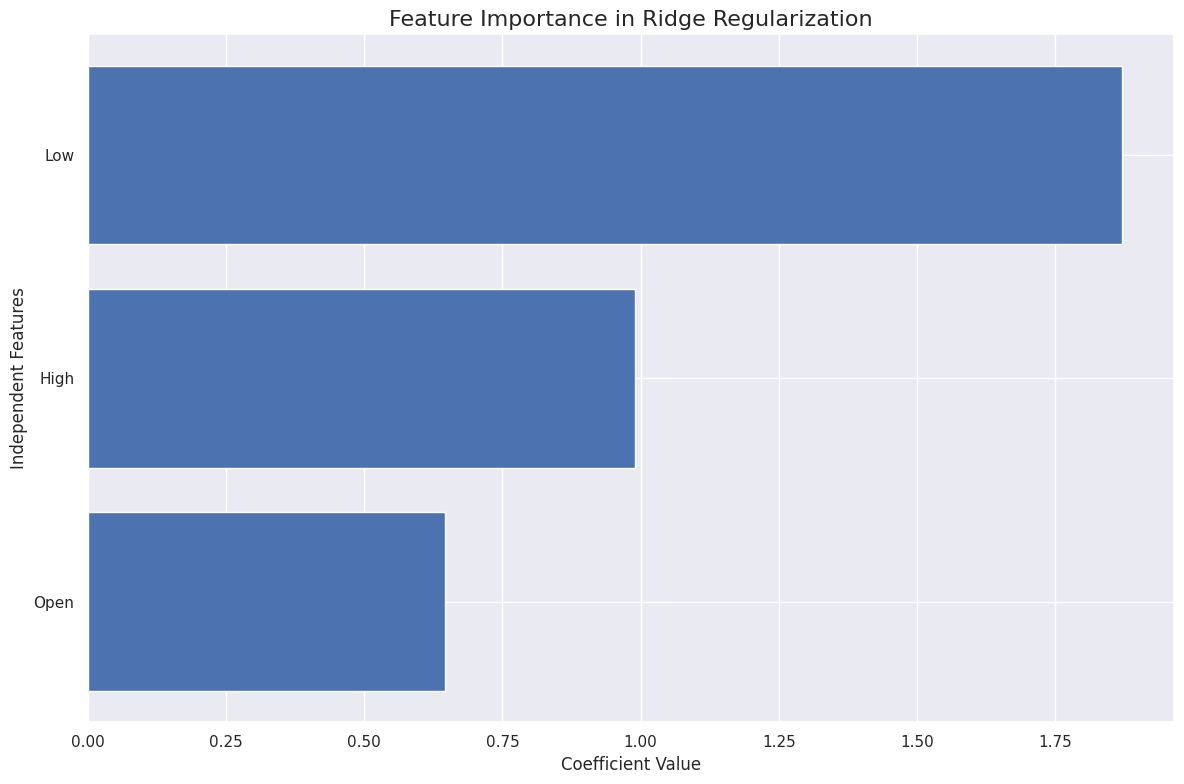

In [ ]:
# Retrieve the coefficients (feature weights)
coefficients = ridge.coef_

# Create an array of feature names
feature_names = np.array(['Open','High','Low'])

# Sort the coefficients and corresponding feature names
sorted_features = [feature for _, feature in sorted(zip(coefficients, feature_names))]
sorted_coefficients = np.sort(coefficients)

# Plotting the feature importance
plt.figure(figsize=(12, 8))
bar_width= 0.5
plt.barh(sorted_features, sorted_coefficients)
plt.title("Feature Importance in Ridge Regularization", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Independent Features", fontsize=12)
plt.tight_layout()
plt.show()

According to the model choosen **Low** feature is contributing the most.

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle



In [ ]:
ridge = Ridge()
ridge.fit(X_train1, Y_train)

Ridge()

In [ ]:
model_file = 'ridge.pkl'

# Save the model to the specified file path
with open(model_file, 'wb') as file:
    pickle.dump(ridge, file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Specify the file path of the saved model
model_file = 'ridge.pkl'

# Load the model from the pickle file
with open(model_file, 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Predict using the loaded model and x_test1
y_pred1 = loaded_model.predict(X_test1)

In [ ]:
y_pred1

array([3.50734529, 4.93934272, 4.00710773, 4.89367224, 4.14387691,
       3.42855828, 5.3838327 , 2.85495993, 2.70253764, 5.23898254,
       5.64987772, 4.54897216, 4.97907411, 4.08800695, 4.59095521,
       5.44572109, 4.27343821, 3.32018801, 5.44159647, 3.95991876,
       2.35538411, 4.72427749, 4.99057933, 4.0386292 , 5.29362187,
       3.77856759, 5.48790237, 2.68468719, 4.65349905, 4.04776196,
       4.12275971, 5.19519265, 4.24061772, 5.08661942, 3.6706826 ,
       3.89175124, 5.47674457])

In [ ]:
Y_test

array([3.52812368, 4.97831869, 3.84908321, 4.95639028, 4.13067649,
       3.40651654, 5.44354262, 2.78006074, 2.61812549, 5.26940336,
       5.71998385, 4.51415079, 5.03239679, 4.13324471, 4.12366062,
       5.6169529 , 4.27471978, 3.28952066, 5.63157014, 3.90881787,
       2.30058309, 4.71581671, 4.99687438, 4.07736794, 5.39951925,
       4.25490324, 5.52485515, 2.5960007 , 4.68407378, 3.96252599,
       4.12366062, 4.12366062, 4.33650612, 5.09565024, 3.72231423,
       3.85693304, 5.53544272])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Closing Price** of a stock refers to the final price at which the stock is traded on a particular stock exchange on a given trading day. It is the last price at which the stock is bought or sold during the trading session.

*Importance:* The closing price is an important metric used by investors, analysts, and traders to evaluate a company’s financial health, market value, and stock performance. It is also used to calculate other important metrics such as the daily price change, market capitalization, and trading volume.

For an *Average Investor:* An average investor sees investing in stocks for long-term purposes and in premium stocks that have proved to be quality and high-performing stocks over the years. For such investors, the daily closing price may not hold as high importance as for an average trader.

For a *Traders:* For traders and analysts, the information on the closing price of stocks is essential to make sure that they make sound trading decisions and maximize returns on their portfolios.

**Models Implemented**
* I have implemented six models/Algorithms- Linear Regression,Lasso Reguralization,Ridge Reguralization,Elastic Net, Random Forest Regressor, XG BOSST Regressor.
* The best performing model to predict the closing stock price of yes bank is **Ridge Reguralization** having training and testing accuracy as 95% and 94% respectively in untuned condition having lowest *RMSE*(.219), with cross-validation and hyperparameter tuning(*Tuned Model*) its training and testing accuracy is 97% and 94% respectively which tends to generalized fitting and prone to slight-risk of overfitting.


* All *Independent Features*(High,Low,Open) are Strongly correlated with each other as well with the *depenedent Feature*(Close) also.
* According to the best performing model Feature **Low** is of utmost importance.

* Evaluation Metrics used to choose the best performing model is *r2_score* and *RMSE*.

 *The results indicate adopting supervised Learning Algorithms to identify stock manipulation using a labeled dataset based on a Fraud case is promising*.










### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***